In [2]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch
import os
import config
import matplotlib.pyplot as plt

from utils import label2onehot

In [3]:
class StarGANDataset:
    def __init__(self, root, batch_size=32, image_size=128):
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        self.root_dir = root
        self.dataset = ImageFolder(root=root, transform=self.transform)
        self.data_loader = DataLoader(self.dataset, batch_size=batch_size, shuffle=True, num_workers=4)
        
        self.domain_map = {
            'Fog':  [1, 0, 0, 0],
            'Rain': [0, 1, 0, 0],
            'Sand': [0, 0, 1, 0],
            'Snow': [0, 0, 0, 1]
        }
        
    def get_dataloader(self):
        return self.data_loader

    def get_domain_labels(self, folder_labels):
        return torch.tensor([self.domain_map[self.dataset.classes[label]] for label in folder_labels])
    
    


In [4]:
# Create an instance of StarGANDataset
stargan_data = StarGANDataset(root=config.TRAIN_DIR, batch_size=32, image_size=128)

# Fetch data using the dataloader
data_loader = stargan_data.get_dataloader()

In [5]:
# Function to denormalize and convert tensor to numpy for visualization
def tensor_to_img(tensor):
    tensor = tensor * 0.5 + 0.5  # Denormalize
    numpy_img = tensor.numpy()
    return numpy_img.transpose((1, 2, 0))  # Convert from CxHxW to HxWxC

def plot_images(images, labels, no_img):
    fig, ax = plt.subplots(1, no_img, figsize=(15,5))
    for i in range(no_img):
        ax[i].imshow(tensor_to_img(images[i]))
        ax[i].set_title(stargan_data.dataset.classes[labels[i]])
        ax[i].axis('off')

    plt.show()

def count_class_imags(root_dir):
        folder_counts = {}

        for folder_name in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder_name)
            if os.path.isdir(folder_path):
                folder_counts[folder_name] = len(os.listdir(folder_path))

        return folder_counts

In [6]:
for images, labels in data_loader:
    print(images.shape)  # Should be [batch_size, 3, 128, 128]
    domain_labels = stargan_data.get_domain_labels(labels)
    print(domain_labels)
    break


torch.Size([32, 3, 128, 128])
tensor([[0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]])


In [34]:
x,y = next(iter(data_loader))

print(f"img_size: {x.shape}")
print(f"labels: {y}")
print(f"first label's onehot encoded vector: {stargan_data.get_domain_labels(labels)[0]}")

img_size: torch.Size([32, 3, 128, 128])
labels: tensor([0, 0, 1, 0, 1, 2, 2, 1, 0, 3, 2, 1, 0, 0, 1, 0, 2, 0, 3, 3, 2, 3, 2, 2,
        0, 1, 2, 3, 2, 2, 1, 1])
first label's onehot encoded vector: tensor([0, 0, 1, 0])


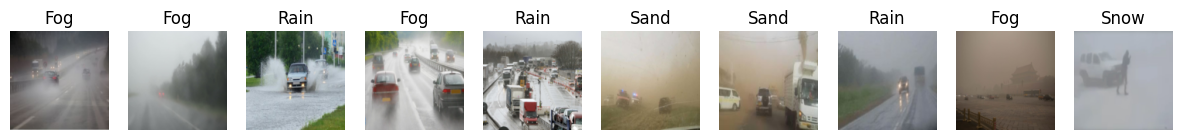

In [35]:
plot_images(x,y,10)

In [9]:
class_counts = count_class_imags(config.TRAIN_DIR)
print(class_counts)

{'Rain': 200, 'Sand': 323, 'Snow': 204, 'Fog': 300}


In [36]:
label_org = stargan_data.get_domain_labels(y)
print(f"original label: {label_org}")

# Generate target domain labels randomly.
rand_idx = torch.randperm(label_org.size(0))
label_trg = label_org[rand_idx]

print(f"target label: {label_trg}")

c_org = label_org.clone()
#c_org = label2onehot(label_org, 4)
#c_trg = label2onehot(label_trg, 4)

print(f"onehot vector: \n{c_org}")
print(c_org.shape)

original label: tensor([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])
target label: tensor([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
 

In [37]:
print(f"img shape: {x.shape}")

c = c_org.view(c_org.size(0), c_org.size(1), 1, 1)
c = c.repeat(1, 1, x.size(2), x.size(3))
x = torch.cat([x, c], dim=1)

print(f"one-hot-encoded vector label shape: {c.shape}")

print(f"concatenated img shape: {x.shape}")

img shape: torch.Size([32, 3, 128, 128])
one-hot-encoded vector label shape: torch.Size([32, 4, 128, 128])
concatenated img shape: torch.Size([32, 7, 128, 128])
